# Fetal health prediction

To create this model we took the Fetal Health dataset from [Kaggle](https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification) with the following variables:

- 'baseline value'- FHR baseline (beats per minute)
- 'accelerations'- Number of accelerations per second
- 'fetal_movement'- Number of fetal movements per second
- 'uterine_contractions'- Number of uterine contractions per second
- 'light_decelerations'- Number of light decelerations per second
- 'severe_decelerations'- Number of severe decelerations per second
- 'prolongued_decelerations'- Number of prolonged decelerations per second
- 'abnormal_short_term_variability'- Percentage of time with abnormal short term variability
- 'mean_value_of_short_term_variability'- Mean value of short term variability
- 'percentage_of_time_with_abnormal_long_term_variability'- Percentage of time with abnormal long term variability
- 'mean_value_of_long_term_variability'- Mean value of long term variability
- 'histogram_width'- Width of FHR histogram
- 'histogram_min'- Minimum (low frequency) of FHR histogram
- 'histogram_max'- Maximum (high frequency) of FHR histogram
- 'histogram_number_of_peaks'- Number of histogram peaks
- 'histogram_number_of_zeroes'- Number of histogram zeros
- 'histogram_mode'- Histogram mode
- 'histogram_mean'- Histogram mean
- 'histogram_median'- Histogram median
- 'histogram_variance'- Histogram variance
- 'histogram_tendency'- Histogram tendency
- Target: 'fetal_health' Tagged as 1 (Normal), 2 (Suspect) and 3 (Pathological)

In [1]:
import pandas as pd
datos = pd.read_csv('fetal_health.csv')
datos.head()

baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0                                   0.5   
1                             17.0                                   2.1   
2                             16.0                                   2.1   
3                             16.0                                   2.4   
4                             16.0                                   2.4   

   percentage_of_time_with_abnormal_long_term_variability  ...  histogram_min  \
0                                               43.0       ...           62.0   
1                                                0.0       ...           68.0   
2                                                0.0       ...           68.0   
3                                                0.0       ...           53.0   
4                                                0.0       ...           53.0   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0          126.0                        2.0                         0.0   
1          198.0                        6.0                         1.0   
2          198.0                        5.0                         1.0   
3          170.0                       11.0                         0.0   
4          170.0                        9.0                         0.0   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0           120.0           137.0             121.0                73.0   
1           141.0           136.0             140.0                12.0   
2           141.0           135.0             138.0                13.0   
3           137.0           134.0             137.0                13.0   
4           137.0           136.0             138.0                11.0   

   histogram_tendency  fetal_health  
0                 1.0           2.0  
1                 0.0           1.0  
2                 0.0           1.0  
3                 1.0           1.0  
4                 1.0           1.0  

[5 rows x 22 columns]

In [2]:
datos.describe()

baseline value  accelerations  fetal_movement  uterine_contractions  \
count     2126.000000    2126.000000     2126.000000           2126.000000   
mean       133.303857       0.003178        0.009481              0.004366   
std          9.840844       0.003866        0.046666              0.002946   
min        106.000000       0.000000        0.000000              0.000000   
25%        126.000000       0.000000        0.000000              0.002000   
50%        133.000000       0.002000        0.000000              0.004000   
75%        140.000000       0.006000        0.003000              0.007000   
max        160.000000       0.019000        0.481000              0.015000   

       light_decelerations  severe_decelerations  prolongued_decelerations  \
count          2126.000000           2126.000000               2126.000000   
mean              0.001889              0.000003                  0.000159   
std               0.002960              0.000057                  0.000590   
min               0.000000              0.000000                  0.000000   
25%               0.000000              0.000000                  0.000000   
50%               0.000000              0.000000                  0.000000   
75%               0.003000              0.000000                  0.000000   
max               0.015000              0.001000                  0.005000   

       abnormal_short_term_variability  mean_value_of_short_term_variability  \
count                      2126.000000                           2126.000000   
mean                         46.990122                              1.332785   
std                          17.192814                              0.883241   
min                          12.000000                              0.200000   
25%                          32.000000                              0.700000   
50%                          49.000000                              1.200000   
75%                          61.000000                              1.700000   
max                          87.000000                              7.000000   

       percentage_of_time_with_abnormal_long_term_variability  ...  \
count                                         2126.00000       ...   
mean                                             9.84666       ...   
std                                             18.39688       ...   
min                                              0.00000       ...   
25%                                              0.00000       ...   
50%                                              0.00000       ...   
75%                                             11.00000       ...   
max                                             91.00000       ...   

       histogram_min  histogram_max  histogram_number_of_peaks  \
count    2126.000000    2126.000000                2126.000000   
mean       93.579492     164.025400                   4.068203   
std        29.560212      17.944183                   2.949386   
min        50.000000     122.000000                   0.000000   
25%        67.000000     152.000000                   2.000000   
50%        93.000000     162.000000                   3.000000   
75%       120.000000     174.000000                   6.000000   
max       159.000000     238.000000                  18.000000   

       histogram_number_of_zeroes  histogram_mode  histogram_mean  \
count                 2126.000000     2126.000000     2126.000000   
mean                     0.323612      137.452023      134.610536   
std                      0.706059       16.381289       15.593596   
min                      0.000000       60.000000       73.000000   
25%                      0.000000      129.000000      125.000000   
50%                      0.000000      139.000000      136.000000   
75%                      0.000000      148.000000      145.000000   
max                     10.000000      187.000000      182.000000   

       histogram_median  histogr

In [3]:
#check data type
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [4]:
#check null values
datos.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

# EDA and visualization

For this case we're going to create a copy of our data to add the names to the levels of the target variable (fetal health) and make them easier to understand: `1:Normal`, `2:Suspect`, `3:Pathological`

In [5]:
df_names = pd.DataFrame.copy(datos)

In [6]:
fetalhealth_name = {1:'Normal', 2: 'Suspect', 3: 'Pathological'}
df_names['fetal_health'] = df_names['fetal_health'].replace(fetalhealth_name)

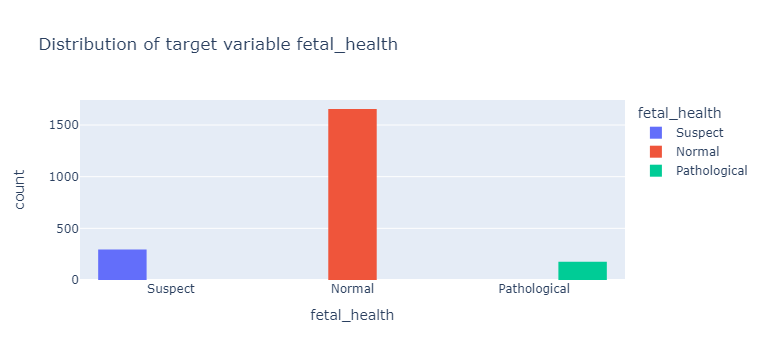

In [7]:
import plotly.express as px
fig = px.histogram(df_names, x="fetal_health",
             color='fetal_health', barmode='group',
             height=400,
             title="Distribution of target variable fetal_health")
fig.show()

In the graph we can see that the target variable (fetal health) is unbalanced, since the largest number of observations belong to the `normal` class.

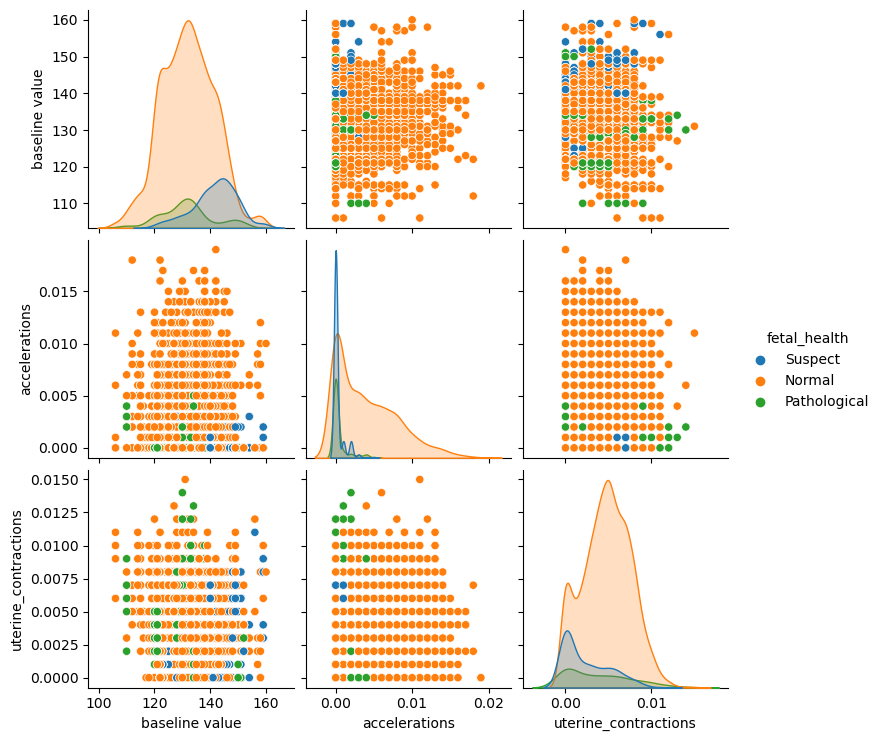

In [8]:
import seaborn as sns
sns.pairplot(df_names, hue = 'fetal_health' , vars = ['baseline value', 'accelerations','uterine_contractions'] )

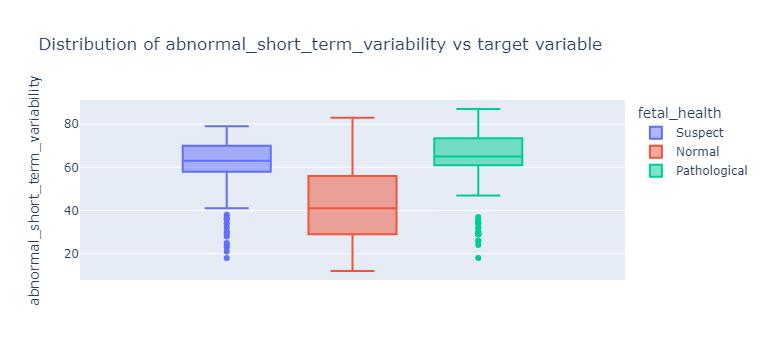

In [9]:
fig = px.box(df_names, y="abnormal_short_term_variability", color="fetal_health",title = 'Distribution of abnormal_short_term_variability vs target variable')
fig.update_traces(quartilemethod="exclusive") 
fig.show()

The graph shows that the observations that belong to the `normal` class have a lower percentage of time with abnormal short term variability compared to the observations that belong to the `suspect` and `pathological` class.

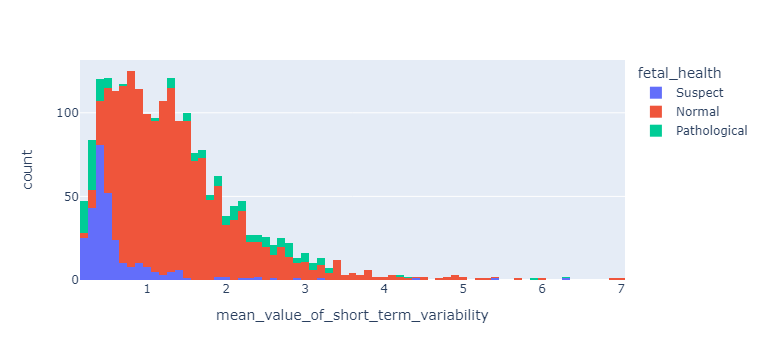

In [10]:
fig = px.histogram(df_names, x="mean_value_of_short_term_variability",  color="fetal_health")
fig.show()

The observations that belong to the suspicious class present the lowest mean value of short term variability, and those in pathological condition present, in general, the highest mean value of short term variability.

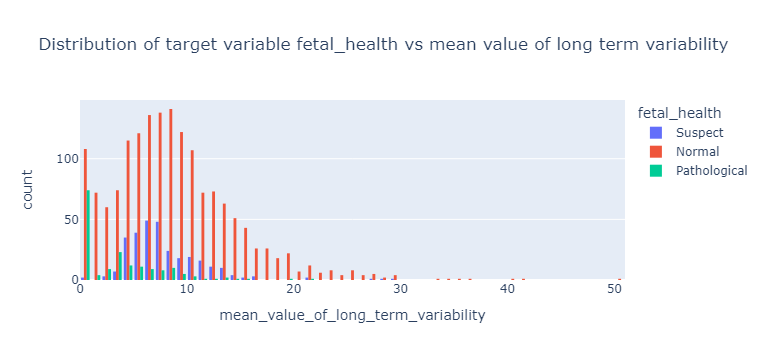

In [11]:
fig = px.histogram(df_names, x="mean_value_of_long_term_variability",
             color='fetal_health', barmode='group',
             height=400,
             title="Distribution of target variable fetal_health vs mean value of long term variability")
fig.show()

It is observed that the observations that belong to the pathological class have a lower mean value of long term variability. Likewise, it is evident that healthy observations (belong to the normal class) have a higher mean. value of long term variability

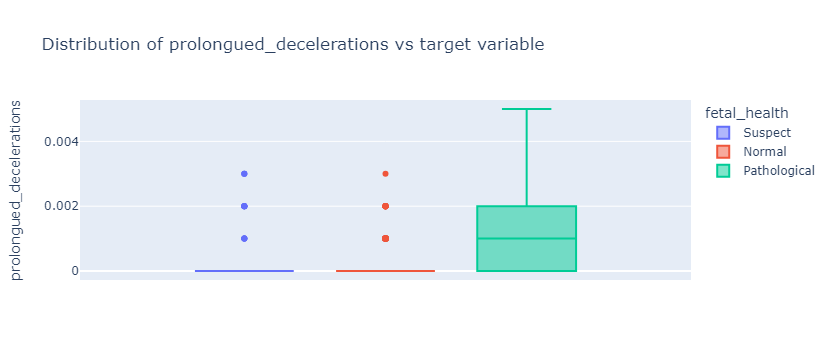

In [12]:
fig = px.box(df_names, y="prolongued_decelerations", color="fetal_health",title = 'Distribution of prolongued_decelerations vs target variable')
fig.update_traces(quartilemethod="exclusive") 
fig.show()

In this variable it is observed that the observations that belong to the suspicious and normal classes have a mean value of zero for prolonged decelerations, while the observations in pathological condition have a higher value for prolonged decelerations. According to this graph it can be said that this will be one of the most important variables for our model.

# Check feature importance

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X= datos.drop('fetal_health',axis=1)
y=datos['fetal_health']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y)

In [15]:
corr_matriz=datos.corr()
#To check these variables with a correlation higher than 0.6
corr_matriz[corr_matriz >= 0.6]

baseline value  \
baseline value                                            1.000000   
accelerations                                                  NaN   
fetal_movement                                                 NaN   
uterine_contractions                                           NaN   
light_decelerations                                            NaN   
severe_decelerations                                           NaN   
prolongued_decelerations                                       NaN   
abnormal_short_term_variability                                NaN   
mean_value_of_short_term_variability                           NaN   
percentage_of_time_with_abnormal_long_term_vari...             NaN   
mean_value_of_long_term_variability                            NaN   
histogram_width                                                NaN   
histogram_min                                                  NaN   
histogram_max                                                  NaN   
histogram_number_of_peaks                                      NaN   
histogram_number_of_zeroes                                     NaN   
histogram_mode                                            0.708993   
histogram_mean                                            0.723121   
histogram_median                                          0.789246   
histogram_variance                                             NaN   
histogram_tendency                                             NaN   
fetal_health                                                   NaN   

                                                    accelerations  \
baseline value                                                NaN   
accelerations                                                 1.0   
fetal_movement                                                NaN   
uterine_contractions                                          NaN   
light_decelerations                                           NaN   
severe_decelerations                                          NaN   
prolongued_decelerations                                      NaN   
abnormal_short_term_variability                               NaN   
mean_value_of_short_term_variability                          NaN   
percentage_of_time_with_abnormal_long_term_vari...            NaN   
mean_value_of_long_term_variability                           NaN   
histogram_width                                               NaN   
histogram_min                                                 NaN   
histogram_max                                                 NaN   
histogram_number_of_peaks                                     NaN   
histogram_number_of_zeroes                                    NaN   
histogram_mode                                                NaN   
histogram_mean                                                NaN   
histogram_median                                              NaN   
histogram_variance                                            NaN   
histogram_tendency                                            NaN   
fetal_health                                                  NaN   

                                                    fetal_movement  \
baseline value                                                 NaN   
accelerations                                                  NaN   
fetal_movement                                                 1.0   
uterine_contractions                                           NaN   
light_decelerations                                            NaN   
severe_decelerations                                           NaN   
prolongued_decelerations                                       NaN   
abnormal_short_term_variability                                NaN   
mean_value_of_short_term_variability                           NaN   
percentage_of_time_with_abnormal_long_term_vari...             NaN   
mean_value_of_long_term_variability                            NaN   
histogram_wid

The correlation matrix shows that there is a high correlation between the variables:
- Histogram_mode, histogram_mean and histogram_median with the variable baseline_value.
- Histogram_mode with histogram_mean and histogram_median
- Histogram_width with histogram_max, histogram_number_of_peaks, histogram_variance, mean_value_of_long_term_variability

Now we are going to try the SelectKBest method to also get an idea of the importance of the variables for the model

In [16]:
from sklearn.feature_selection import SelectKBest, f_classif
sel = SelectKBest(score_func=f_classif,k=10)
sel.fit(X_train, y_train)

SelectKBest()

In [17]:
sel.get_feature_names_out()

array(['baseline value', 'accelerations', 'prolongued_decelerations',
       'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'histogram_mode', 'histogram_mean', 'histogram_median',
       'histogram_variance'], dtype=object)

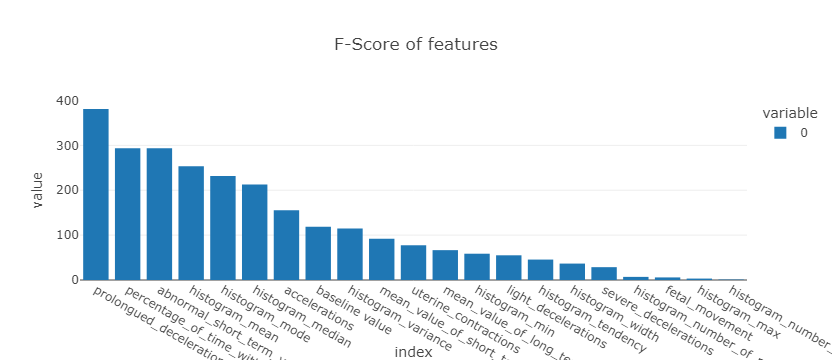

In [18]:
scores = pd.Series(sel.scores_, index=X.columns)
scores = scores.sort_values(ascending=False)
px.bar(scores, template="none", title="F-Score of features")

As we mentioned before, the variable `prolonged_decelerations` is the most important feature for the model.

Now we will check the correlation between variables 

<AxesSubplot: >

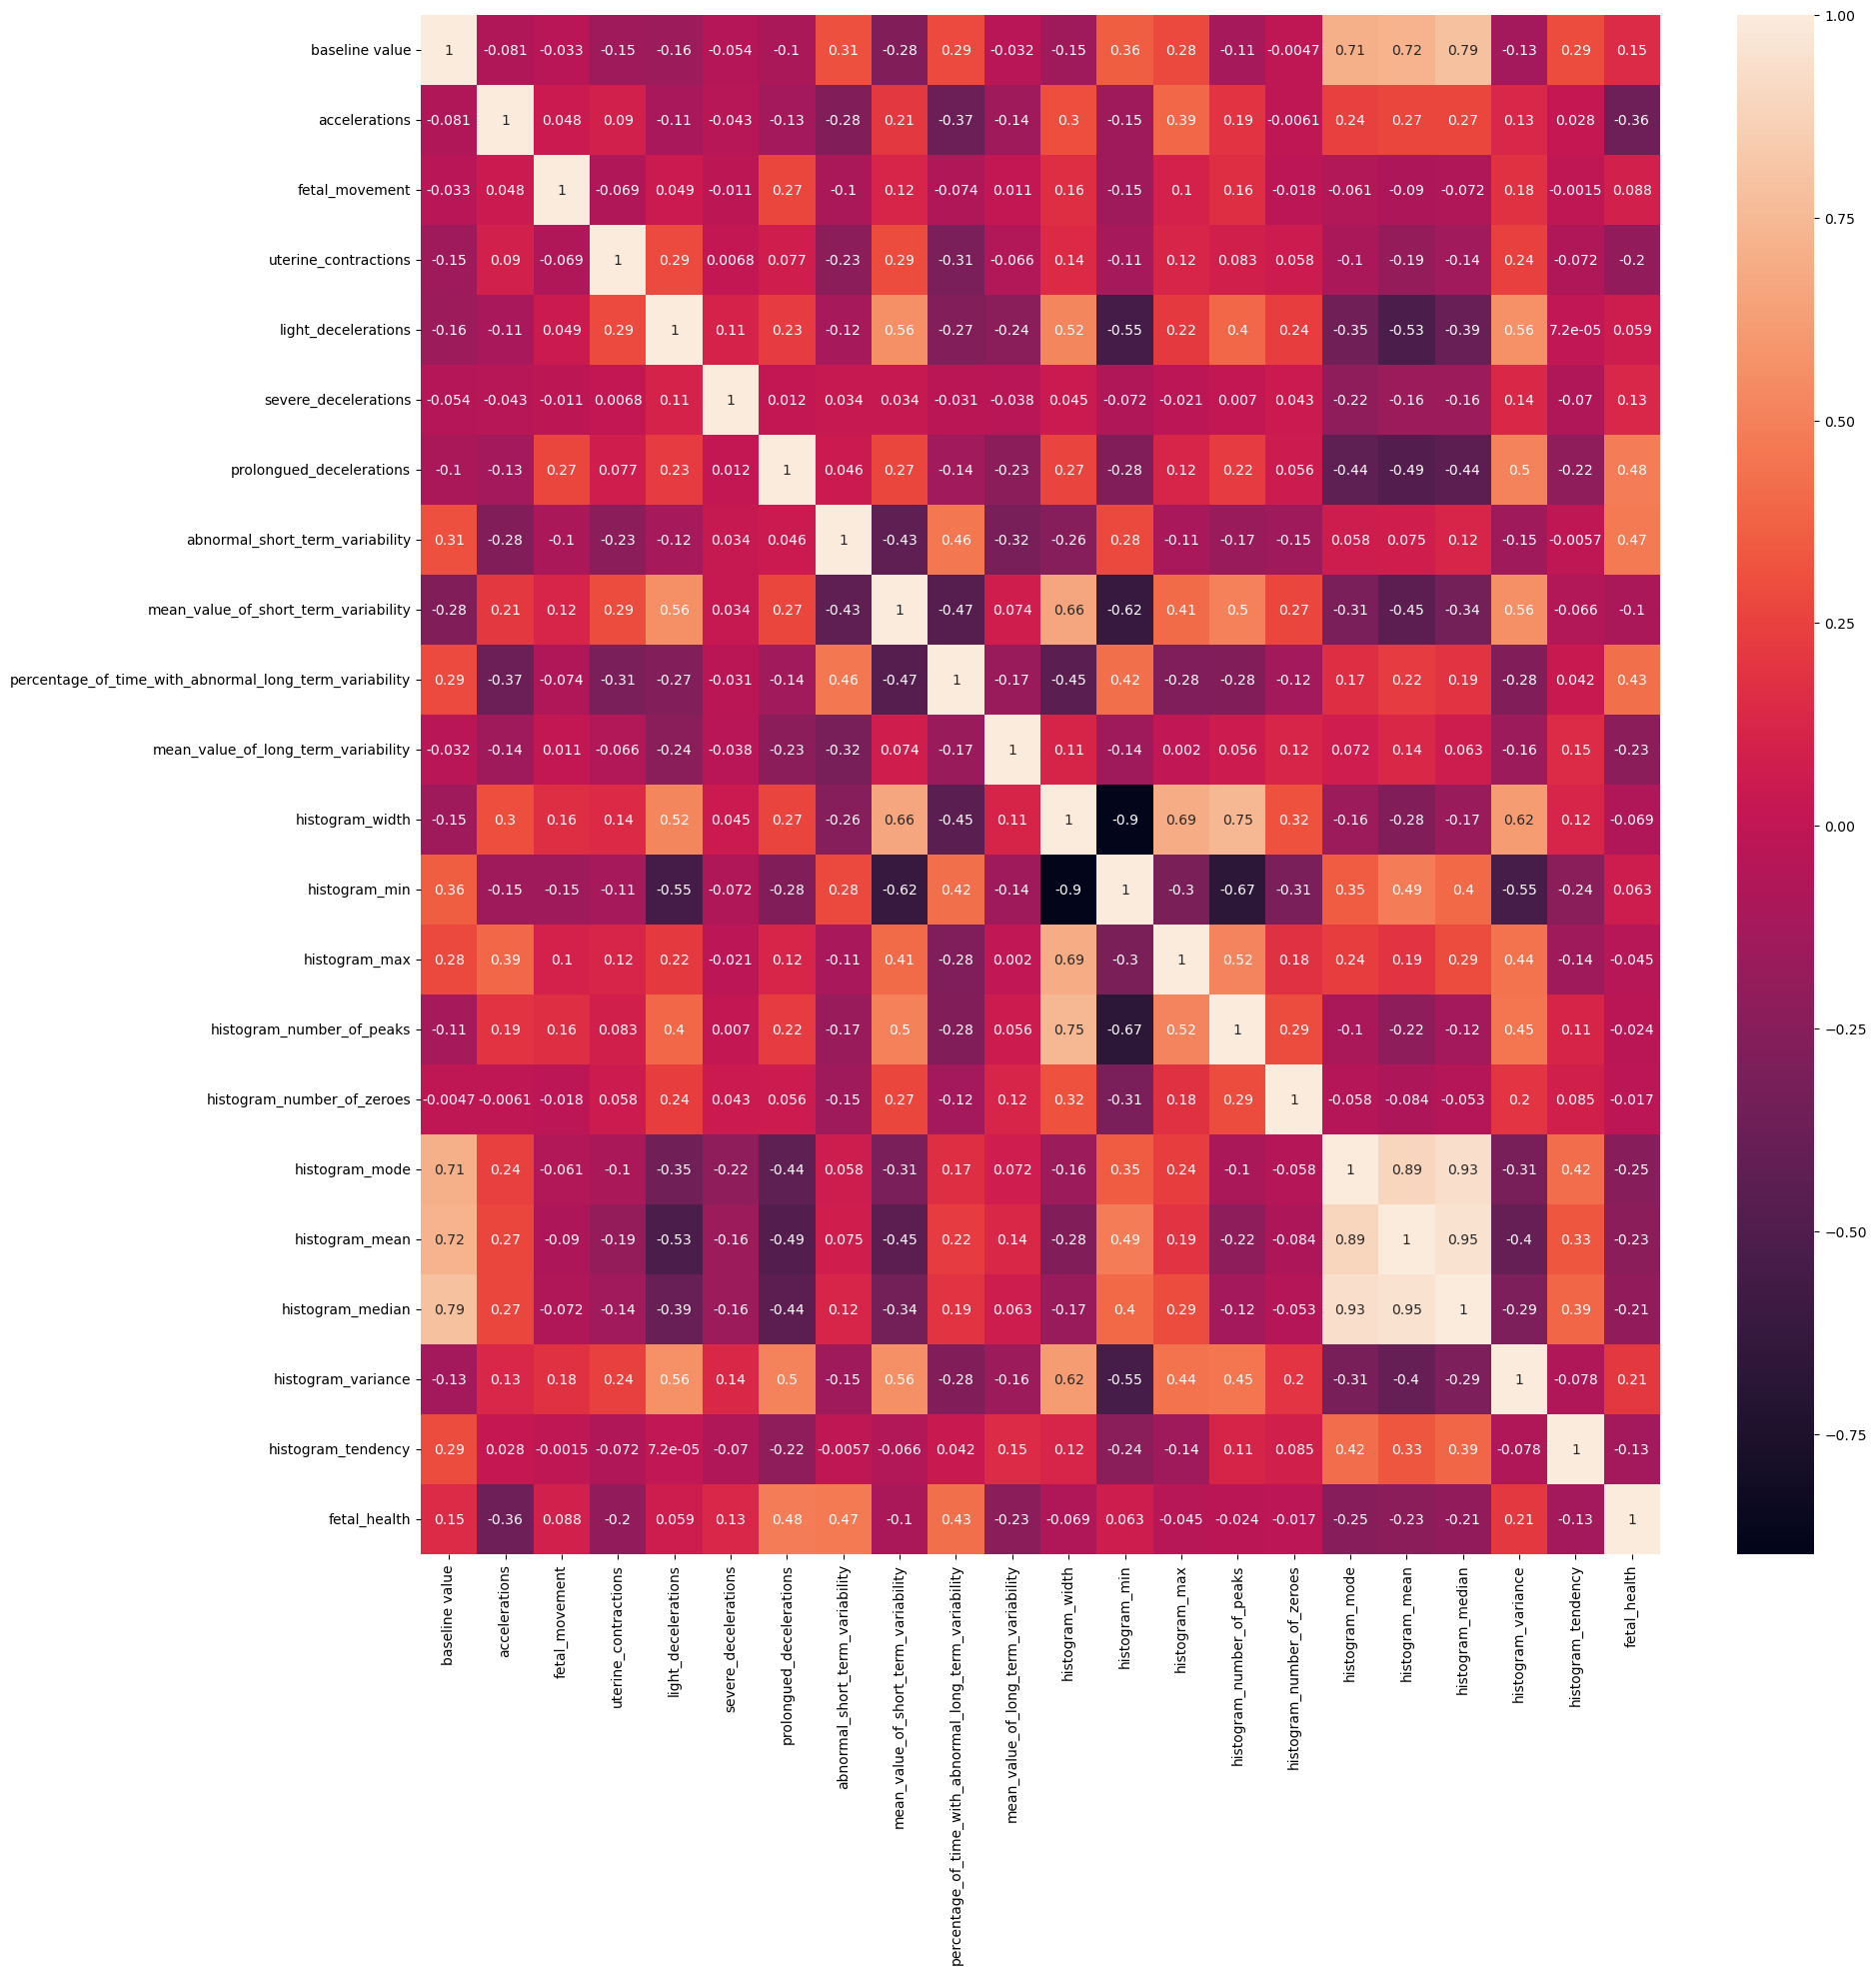

In [19]:
import matplotlib.pyplot as plt
correlations = datos.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

In attention to the results obtained in the feature importance graph and analyzing the correlation matrix, taking into account that there is a great correlation between `histogram_width` and `histogram_min` and their feature importance is lower, we will proceed to eliminate them

In [20]:
datos_final= datos.drop(['histogram_width','histogram_min'],axis=1)

<AxesSubplot: >

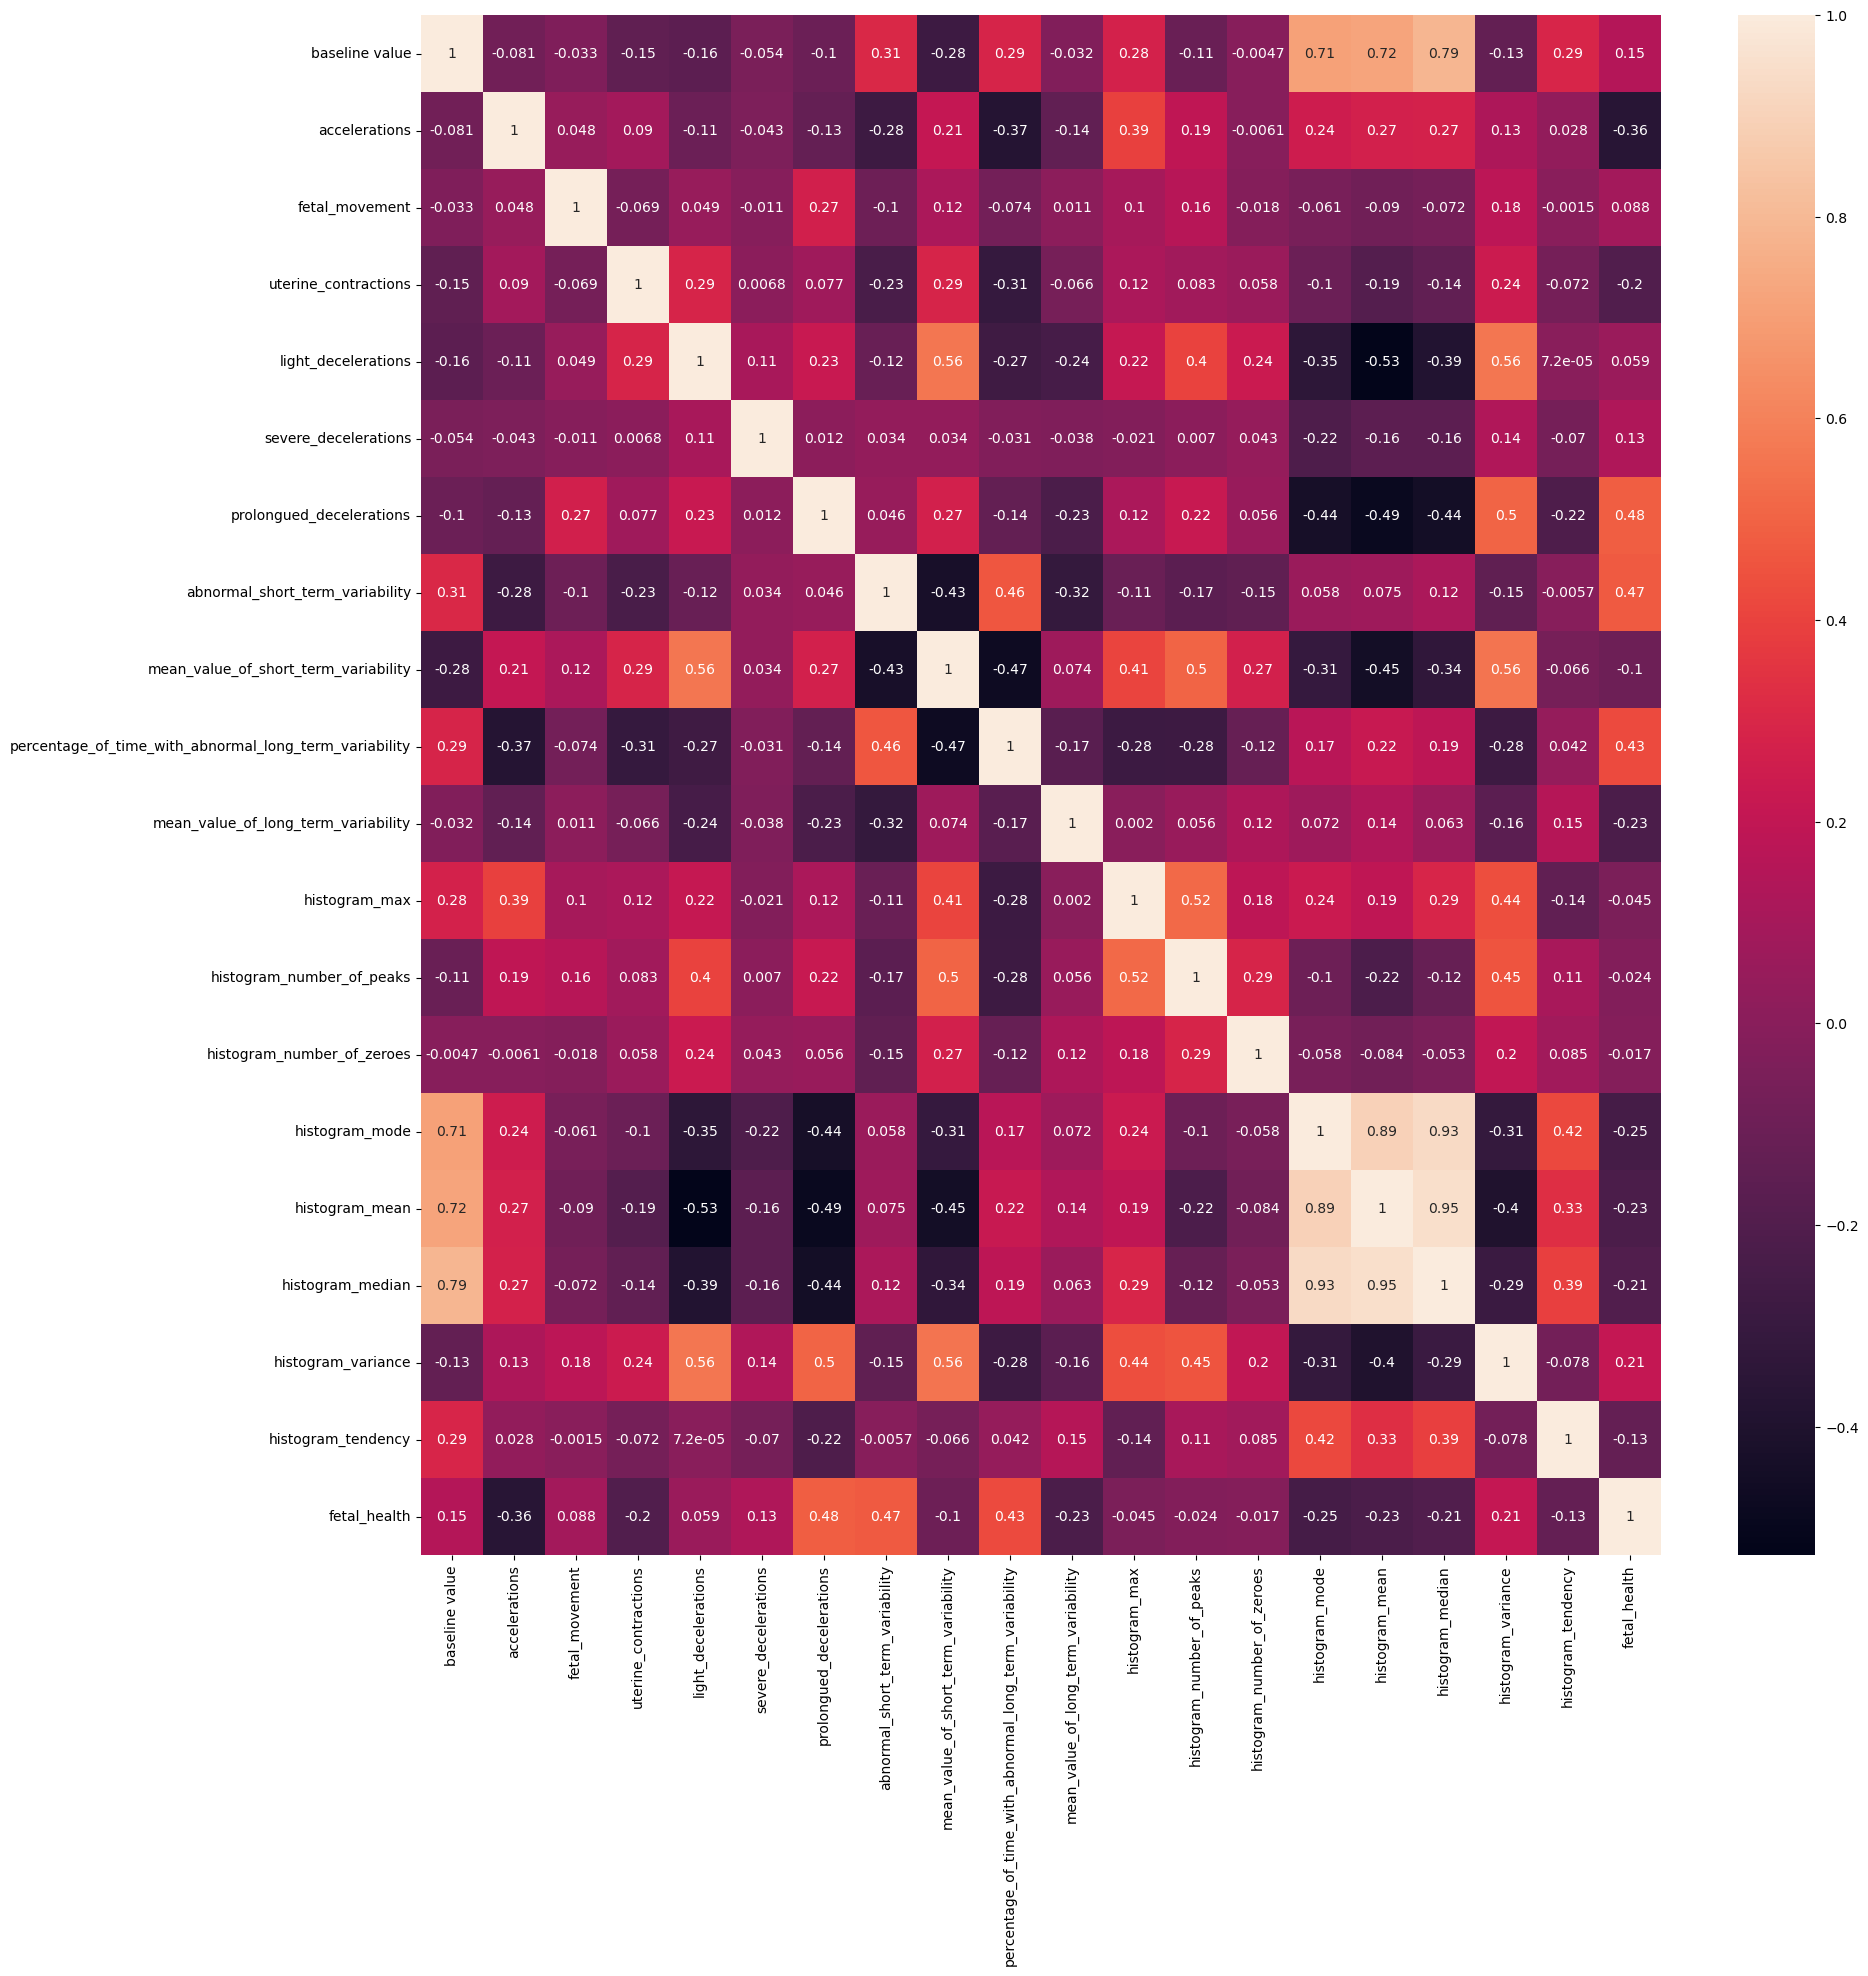

In [21]:
#we check correlation again
import matplotlib.pyplot as plt
correlations = datos_final.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

In [22]:
datos_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 20 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [23]:
#split again in test and train
X= datos_final.drop('fetal_health',axis=1)
y=datos_final['fetal_health']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y)

In [24]:
display(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1700, 19)

(426, 19)

(1700,)

(426,)

In [25]:
#now we have to encode the target variable which is 1,2 and 3 so that it is 0, 1 and 2
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test= label_encoder.transform(y_test)

# Classification model

For this case, we will do an XGBoost classification model, so it will not be necessary to scale the data. Likewise, there are no categorical features, so it is not necessary to apply encoding.
Taking into account that the output variable is unbalanced, we will add the hyperparameter `scoring="roc_auc_ovr_weighted"`, so that the model takes into account that it is a multiclass classification and the output is unbalanced.

In [26]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

In [27]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [28]:
parameters = {
    'n_estimators': range(10, 90, 5),
    'max_depth': range(3, 40, 2),
    'min_child_weight': range(1, 40, 2),
    'gamma': [0, 0.1, 0.2, 0.3]
}

xgb = xgb.XGBClassifier()

clf = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=parameters,
    n_iter=5,
    scoring="roc_auc_ovr_weighted",
    n_jobs=7,
    return_train_score=True
)

clf.fit(X_train, y_train)

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=5, n_jobs=7,
                   param_distributions={'gamma': [0, 0.1, 0.2, 0.3],
                                        'max_depth': range(3, 40, 2),
                                        'min_child_weight': range(1, 40, 2),
                                        'n_estimators': range(10, 90, 5)},
                   return_train_score=True, scoring='roc_auc_ovr_weighted')

In [29]:
print(clf.best_params_)

{'n_estimators': 35, 'min_child_weight': 5, 'max_depth': 5, 'gamma': 0.2}


## Evaluate the model

First we will evaluate the performance of the model with the training data and then we will do it with the test data, this way we can compare both results and thus check if our model has overfitting.

Since this is a multiclass classification model, we are going to review the AUC obtained in each class and the general AUC, which will be an average of the AUC of each class, both in the train and test data.

In [30]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, auc, roc_auc_score
import plotly.graph_objects as go

In [31]:
#first evaluate in the train data
proba_train = clf.predict_proba(X_train)
pred_train = clf.predict(X_train)

In [32]:
auc_score_train = roc_auc_score(y_train, proba_train, multi_class="ovr", average=None)
avg_auc_score_train = roc_auc_score(y_train, proba_train, multi_class="ovr", average="weighted")
for i, auc in enumerate(auc_score_train):
    print(f"AUC Class {i}: {round(auc,3)}")
    
print(f"Avg. AUC (Macro Wieighted): {round(avg_auc_score_train,3)}")

AUC Class 0: 1.0
AUC Class 1: 1.0
AUC Class 2: 1.0
Avg. AUC (Macro Wieighted): 1.0


In [33]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1323
           1       0.98      0.96      0.97       236
           2       0.99      0.97      0.98       141

    accuracy                           0.99      1700
   macro avg       0.99      0.98      0.98      1700
weighted avg       0.99      0.99      0.99      1700



In [34]:
#now evaluate in the test
proba_test = clf.predict_proba(X_test)
pred_test = clf.predict(X_test)

In [35]:
auc_score_test = roc_auc_score(y_test, proba_test, multi_class="ovr", average=None)
avg_auc_score_test = roc_auc_score(y_test, proba_test, multi_class="ovr", average="weighted")
for i, auc in enumerate(auc_score_test):
    print(f"AUC Class {i}: {round(auc,3)}")
    
print(f"Avg. AUC (Macro Wieighted): {round(avg_auc_score_test,3)}")

AUC Class 0: 0.983
AUC Class 1: 0.974
AUC Class 2: 1.0
Avg. AUC (Macro Wieighted): 0.983


In [36]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       332
           1       0.92      0.80      0.85        59
           2       1.00      0.97      0.99        35

    accuracy                           0.96       426
   macro avg       0.96      0.92      0.94       426
weighted avg       0.96      0.96      0.96       426



## ROC Curve for each class

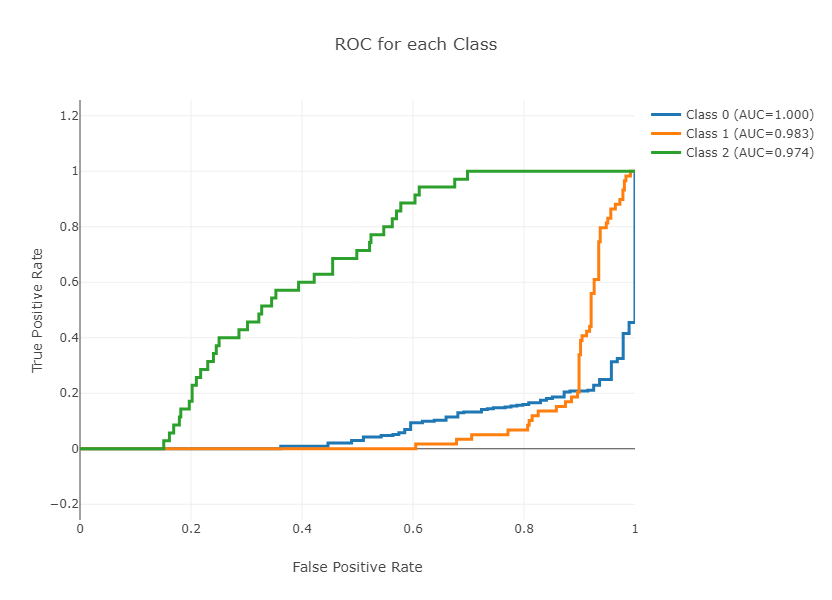

In [37]:
fig = go.Figure()

for i in clf.classes_:
    y_true = (y_test==i).astype(int)
    y_score = proba_test[:, i-1]
    fpr, tpr, _ = roc_curve(y_true, y_score)

    name = f"Class {i} (AUC={auc_score_test[i-1]:.3f})"
    fig.add_trace(go.Scatter(x=fpr, y=tpr, name=name, mode='lines', line=dict(width=3)))

fig.update_layout(
    title="ROC for each Class",
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    template="none",
    yaxis=dict(scaleanchor="x", scaleratio=0.5),
    width=1000, height=600
)

In [38]:
import pickle
with open ("Fetal_model.pkl", "wb") as f:
    pickle.dump(clf, f)